In [1053]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt

In [1054]:
from sklearn import datasets

In [1055]:
data=pd.read_csv('universalBank.csv')

In [1056]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,NaN,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,NaN,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [1057]:
data.dtypes

ID                      int64
Age                   float64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [1058]:
data.shape
#UB.describe()

(5000, 14)

In [1059]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Fetched the Observation variables and the Target as Income and Personal Loan respectively

In [1060]:
X,y = data.loc[:, data.columns == "Income"],data.loc[:, data.columns == "Personal Loan"]

In [1061]:

#print(data['Income'].value_counts())
#print(" Target Observation " , y.shape )
print(data['Age'].value_counts())

35.0    151
43.0    149
52.0    145
54.0    143
58.0    143
50.0    138
41.0    136
30.0    136
56.0    135
34.0    133
57.0    132
39.0    132
59.0    131
51.0    129
60.0    127
45.0    127
46.0    127
42.0    126
55.0    125
40.0    125
31.0    125
29.0    123
62.0    123
61.0    122
44.0    121
33.0    120
32.0    120
48.0    118
49.0    115
38.0    115
47.0    113
53.0    112
63.0    108
36.0    107
37.0    106
28.0    103
27.0     91
65.0     80
26.0     78
64.0     78
25.0     52
24.0     28
66.0     24
23.0     12
67.0     12
Name: Age, dtype: int64


Impute the missing Numeric values : Age Column using median of Age

In [1062]:
from sklearn.preprocessing import Imputer
import numpy

#data['Age'] = Imputer.fit_transform(data['Age'])

print(data['Age'])

print(data.isnull().sum())


data.loc[data['Age'].isnull(),'Age'] = data['Income'].median()
# count the number of NaN values in each column
print(data.isnull().sum())

print("   After Imputation............... " )

print(data['Age'])

print(data.isnull().sum())



0        NaN
1       45.0
2        NaN
3       35.0
4       35.0
5       37.0
6       53.0
7       50.0
8       35.0
9        NaN
10      65.0
11      29.0
12      48.0
13       NaN
14      67.0
15      60.0
16      38.0
17      42.0
18      46.0
19      55.0
20      56.0
21      57.0
22      29.0
23      44.0
24      36.0
25      43.0
26      40.0
27      46.0
28      56.0
29      38.0
        ... 
4970    37.0
4971    58.0
4972    58.0
4973    31.0
4974    59.0
4975    38.0
4976    29.0
4977    40.0
4978    57.0
4979    50.0
4980    29.0
4981    34.0
4982    36.0
4983    51.0
4984    27.0
4985    48.0
4986    32.0
4987    48.0
4988    34.0
4989    24.0
4990    55.0
4991    51.0
4992    30.0
4993    45.0
4994    64.0
4995    29.0
4996    30.0
4997    63.0
4998    65.0
4999    28.0
Name: Age, Length: 5000, dtype: float64
ID                    0
Age                   4
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0

Applying the Standard Scalar: Need to check the order of same wrt Strtification ??????????????????????

In [1063]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



#print(X_train.shape)
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))




mean : Age                      45.228000
Experience               20.001143
Income                   74.253714
ZIP Code              93130.595143
Family                    2.390571
CCAvg                     1.945883
Education                 1.876857
Mortgage                 57.516286
Securities Account        0.109714
CD Account                0.061143
Online                    0.601143
CreditCard                0.291429
dtype: float64 
standard deviation : Age                     11.552582
Experience              11.556242
Income                  46.317649
ZIP Code              2249.840881
Family                   1.145725
CCAvg                    1.763778
Education                0.838473
Mortgage               104.361390
Securities Account       0.312578
CD Account               0.239626
Online                   0.489733
CreditCard               0.454485
dtype: float64 


After  applying Standard scaler : Standard Deviation goes to 1 

In [1064]:

#### Scalar Deviation bring the variables on same scalar. with std deviation as 1
scaler = StandardScaler()


scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.shape)
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))


(3500, 12)
mean : [ -1.28405223e-16   9.23705556e-17   9.74458609e-17   1.54289280e-16
   3.45120757e-17  -4.66928083e-17   1.56319402e-16   1.11656716e-17
   9.74458609e-17  -5.02455220e-17   5.07530526e-17   1.59872116e-17] 
standard deviation : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 


Before Stratification for the test data set : TO Do

In [1065]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)
#### How it changes when stratify is NOT y/ is default?????





print(" Before  stratefication.................")

#print(data['Personal Loan'].unique())
#print(np.bincount(y))
#print(float(len(y)) * 100.0))

#print('All:', np.bincount(y) / float(len(y)) * 100.0)
#print('Training:', np.bincount(y_train) / float(len(y_train)) * 100.0)
#print('Test:', np.bincount(y_test) / float(len(y_test)) * 100.0)
print(X_train.median())


 Before  stratefication.................
Income    63.0
dtype: float64


After Stratification for the test data set : TO DO

In [1066]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y)





print(" After stratefication.................")

#print('All:', np.bincount(y) / float(len(y)) * 100.0)
#print('Training:', np.bincount(y_train) / float(len(y_train)) * 100.0)
#print('Test:', np.bincount(y_test) / float(len(y_test)) * 100.0)


 After stratefication.................


In [1067]:
%matplotlib inline

Here we get the median for the Income : before Stratification

In [1068]:
X_train.median()

Income    63.0
dtype: float64

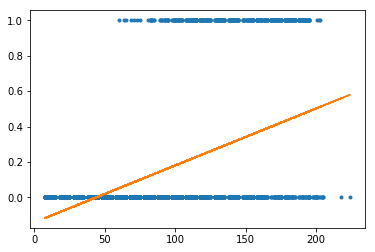

In [1069]:
import matplotlib.pyplot as plt
#X_test = X_test[0,:]
X_test = np.array(data['Income'])
y_test = np.array(data['Personal Loan'])
m, b = np.polyfit(X_test, y_test, 1)

plt.plot(X_test, y_test, '.',label='Line 1')
plt.plot(X_test, m*X_test + b, '-',label='Line 2')

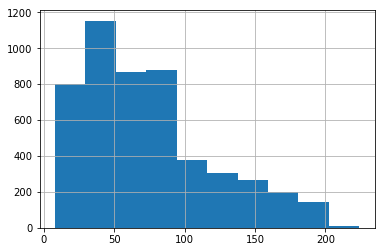

In [1070]:

data['Income'].hist()

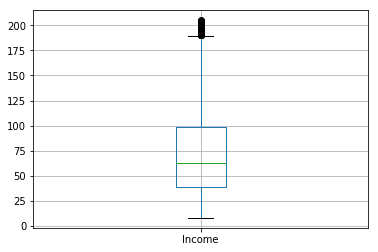

In [1071]:
X_train.boxplot(column='Income')

In [1072]:
UB.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [1073]:
missingVals= list(UB.isnull().sum())

In [1074]:
missingVals

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [1075]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [1076]:
outcome_var='Personal Loan'
predictor_var=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard']

In [1077]:
X = UB[predictor_var]
Y = UB[outcome_var]

In [1078]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)

In [1079]:
My1stmodel=DecisionTreeClassifier()

In [1080]:
My1stmodel.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1081]:
predictions=My1stmodel.predict(X_test)

In [1082]:
#print accuracy
print(metrics.accuracy_score(Y_test,predictions))

0.982666666667


In [1083]:
Y_test.value_counts()

0    1352
1     148
Name: Personal Loan, dtype: int64

In [1084]:
print('True:',Y_test.values[0:50])
print('Pred:',predictions[0:50])

True: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1085]:
print(metrics.confusion_matrix(Y_test,predictions))

[[1341   11]
 [  15  133]]


In [1086]:
confusion = metrics.confusion_matrix(Y_test,predictions)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [1087]:
metrics.confusion_matrix(predictions,Y_test)

array([[1341,   15],
       [  11,  133]])

In [1088]:
from sklearn import tree

from sklearn.tree import export_graphviz
tree.export_graphviz(My1stmodel,out_file='test.dot')

from IPython.core.display import Image, display
display(Image('test.png', width=1900, height=2000, unconfined=True))